# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Acquiringthe Data

In this section we will use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**)

### The Imports

Importing requires libraries for the project

In [2]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import seaborn as sns

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. we will be using stooq finance as a source, for example:**
    
    # Bank of America
    BAC = web.DataReader("BAC", 'stooq', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "stooq" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [3]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [4]:
# Bank of America
BAC = web.DataReader('BAC', 'stooq', start, end)

#Citi Group
C = web.DataReader("C", 'stooq', start, end)

# Goldman Sachs
GS = web.DataReader("GS", 'stooq', start, end)

# JPMorgan Chase
JPM = web.DataReader("JPM", 'stooq', start, end)

# Morgan Stanley
MS = web.DataReader("MS", 'stooq', start, end)

# Wells Fargo
WFC = web.DataReader("WFC", 'stooq', start, end)

**Creating a list of the ticker symbols (as strings) in alphabetical order and Call this list: tickers**

In [5]:
tickers =['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

**Using pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list.(pay attention to what axis you concatenate on).**

In [6]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

**Setting the column name levels.**

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

**Checking the head of the bank_stocks dataframe to make sure our cincatenated dataframe looks correct.**

In [8]:
bank_stocks.head()

Bank Ticker      BAC                                                 C  \
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2006-01-03   39.7180  39.9344  39.0661  39.8533  1.925141e+07  410.185   
2006-01-04   39.7862  39.9916  39.3189  39.4296  2.097767e+07  409.037   
2006-01-05   39.4296  39.6430  39.2113  39.4820  1.751074e+07  405.482   
2006-01-06   39.6153  39.7082  39.2370  39.4208  1.487831e+07  409.185   
2006-01-09   39.5481  39.7605  39.2439  39.4474  1.845131e+07  406.828   

Bank Ticker                                           ...       MS           \
Stock Info      High      Low    Close        Volume  ...     Open     High   
Date                                                  ...                     
2006-01-03   413.344  402.719  412.611  1.836840e+06  ...  37.8570  38.7278   
2006-01-04   411.027  404.719  404.987  2.235056e+06  ...  38.8704  39.2548   
2006-01-05   408.334  405.155  406.977  1.356199e+06  ...  38.6386  38.7991   
2006-01-06   409.324  403.481  406.977  1.636869e+06  ...  38.9170  38.9665   
2006-01-09   407.997  404.303  405.066  2.007837e+06  ...  38.8199  39.2617   

Bank Ticker                                      WFC                    \
Stock Info       Low    Close        Volume     Open     High      Low   
Date                                                                     
2006-01-03   37.5668  38.6069  6.741014e+06  22.8895  23.1626  22.6005   
2006-01-04   38.6386  38.6386  1.000157e+07  23.0305  23.0454  22.7137   
2006-01-05   38.4138  38.7436  7.243742e+06  22.8150  22.8517  22.6759   
2006-01-06   38.4395  38.7833  8.637572e+06  22.8766  23.0116  22.7375   
2006-01-09   38.8140  39.1884  5.195856e+06  22.9451  23.0454  22.8517   

Bank Ticker                         
Stock Info     Close        Volume  
Date                                
2006-01-03   23.1060  1.520929e+07  
2006-01-04   22.8378  1.500717e+07  
2006-01-05   22.8150  1.398718e+07  
2006-01-06   22.9451  1.160232e+07  
2006-01-09   22.9451  7.758446e+06  

[5 rows x 30 columns]

# Exploratory Data Analysis

Let's explore the data a bit! Before continuing, I willencourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html). Since using .xs will be a major part of the project.


**What is the max Close price for each bank's stock throughout the time period?**

In [9]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     46.4714
C      472.2140
GS     205.0270
JPM     57.6748
MS      59.1303
WFC     47.3958
dtype: float64

**Creating a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [10]:
returns = pd.DataFrame()

**We will be using pandas pct_change() method on the Close column to create a column representing this return value. Creating a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [11]:
for tick in tickers:
    returns[tick+' Return']= bank_stocks[tick]['Close'].pct_change()

In [12]:
returns

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010631,-0.018477,-0.013699,-0.014308,0.000821,-0.011607
2006-01-05,0.001329,0.004914,-0.000362,0.003130,0.002717,-0.000998
2006-01-06,-0.001550,0.000000,0.013989,0.007064,0.001025,0.005702
2006-01-09,0.000675,-0.004696,0.012032,0.016240,0.010445,0.000000
...,...,...,...,...,...,...
2015-12-24,-0.004104,0.001452,-0.002503,-0.001916,-0.003611,-0.004024
2015-12-28,-0.008109,-0.006243,-0.004702,-0.003286,-0.009600,-0.002471
2015-12-29,0.008636,0.011509,0.010433,0.010305,0.011816,0.011087


**Creating a pairplot using seaborn of the returns dataframe.**

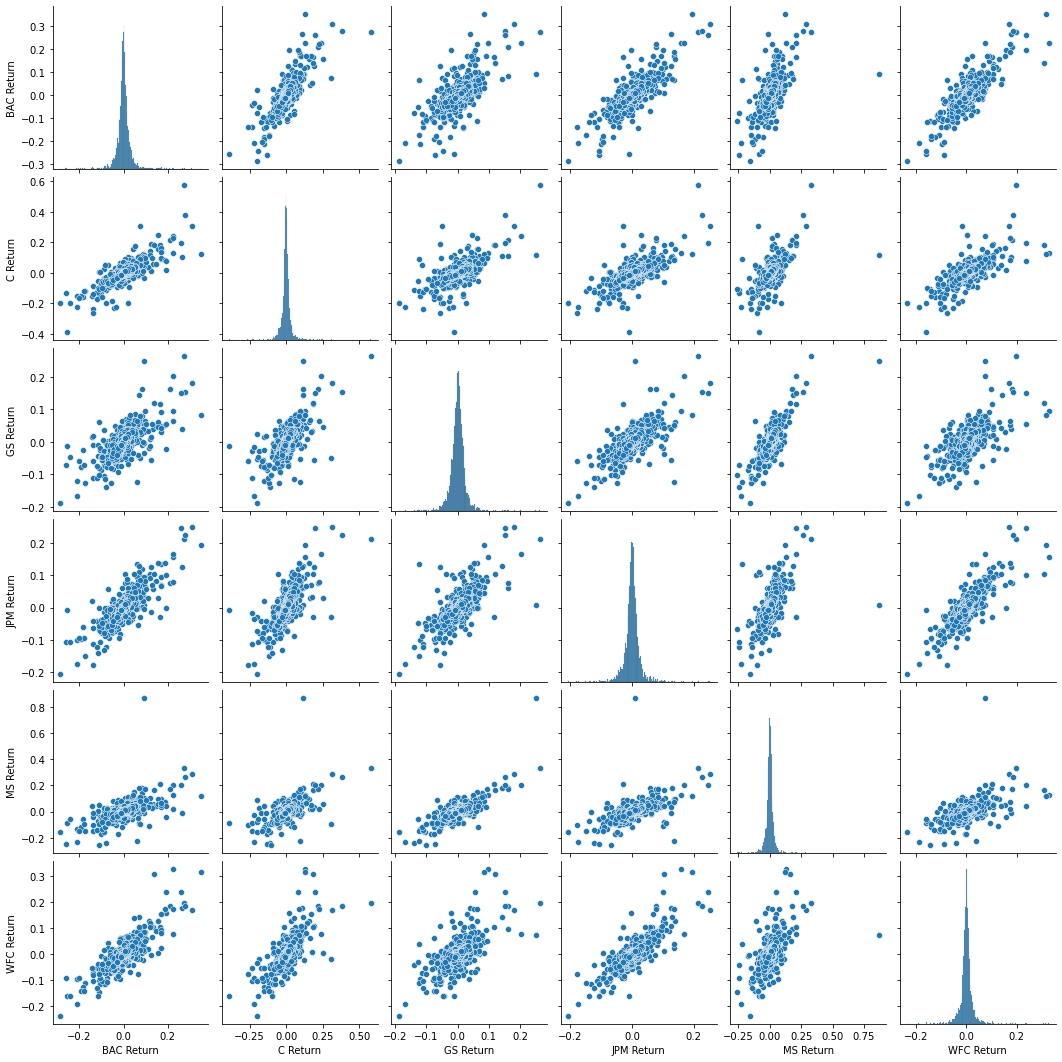

In [13]:
sns.pairplot(returns[1:])

**Using this returns DataFrame, figuring out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [14]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

**We notice that Citigroup's largest drop and biggest gain were very close to one another.**

In [15]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

**Taking a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [16]:
returns.std()

BAC Return    0.036605
C Return      0.038615
GS Return     0.025371
JPM Return    0.027670
MS Return     0.037708
WFC Return    0.030221
dtype: float64

In [17]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016149
C Return      0.015280
GS Return     0.014028
JPM Return    0.013964
MS Return     0.016006
WFC Return    0.012545
dtype: float64

**Creating a distplot using seaborn of the 2015 returns for Morgan Stanley.(Ignore the warning)**

/Users/kanishkgupta/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS Return', ylabel='Density'>

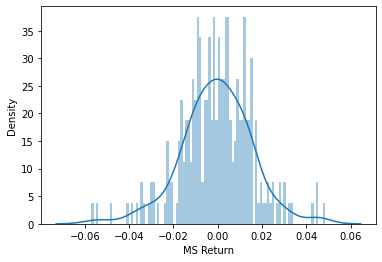

In [18]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], bins=100)

**Creating a distplot using seaborn of the 2008 returns for CitiGroup.(Ignore the Warning)**

/Users/kanishkgupta/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C Return', ylabel='Density'>

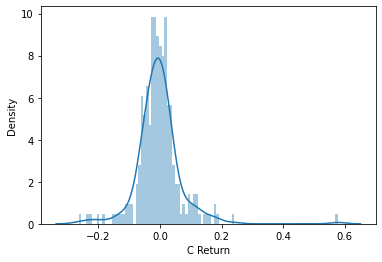

In [19]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], bins=100)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Importing required libraries

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

**Creating a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

<AxesSubplot:xlabel='Date'>

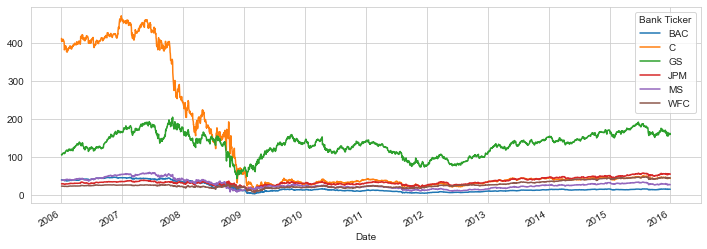

In [21]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,4), label=tick)

### This Line chart shows that there was a massive drop in prices of Goldman Sachs and Citibank stocks near the market crash indiacating these were the banks most affected by the market crash.

**Creating an intercative line plot to closely look at various sections as and when required using iplot().**

In [22]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

**Ploting the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

/var/folders/48/cbtw74f55713826r9yzr8fl00000gn/T/ipykernel_42465/2494955124.py:2: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.

/var/folders/48/cbtw74f55713826r9yzr8fl00000gn/T/ipykernel_42465/2494955124.py:3: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



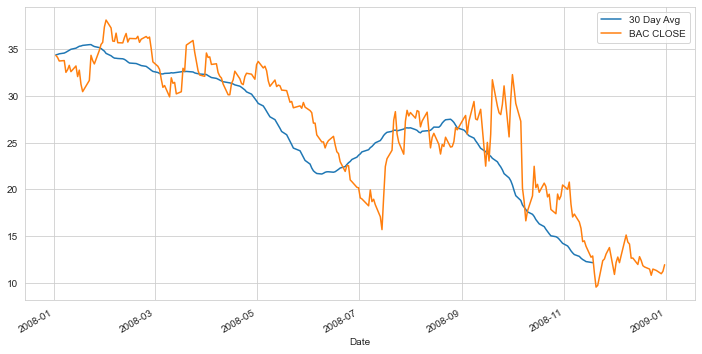

In [23]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

**Creating a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

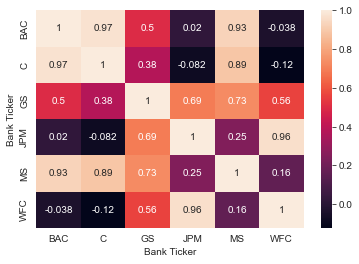

In [24]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

**Using seaborn's clustermap to cluster the correlations together:**

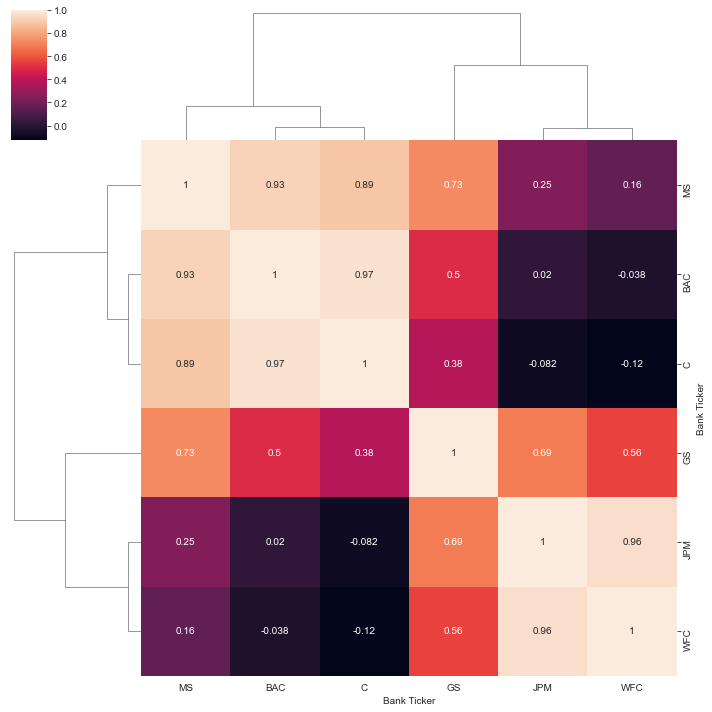

In [25]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [26]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap', colorscale='spectral')


**In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.**

**Using .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [27]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

/var/folders/48/cbtw74f55713826r9yzr8fl00000gn/T/ipykernel_42465/2707617483.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



# Great Job!
